#**Project Statement**
##***Project Scope and Aim***


The current project aims to investigating pertinent  features that affects Maternal Health Risk.


The dataset used consists of 6 features and 1013 records.


##***The medical variables used:*** (taken during pregnancy)

- **Age**
- **SystolicBP:** Upper value of Blood Pressure in mmHg.
- **DiastolicBP:** Lower value of Blood Pressure in mmHg.
- **Blood Sugar (BS)**
- **BodyTemp:**
- **HeartRate**




#**Project Approach**


We aim to predict how likely is a patient to undergo a Maternal health risk based on the previously seen features.




#***1- A first look at Maternal Health Risk Dataset***

1.   ***Data Understanding***
2.   ***Data Preprocessing***

    * Handling Missing Values
    * Handling Duplicates
    * Hot Encoding
    * Dataset Balancing


#***2-  Candidate Models Implementation***

1.    ***Decision Tree Learning and Random Forest***
2.    ***KNN***
3.    ***Naïve Bayes***
4.   ***SVM***
5.   ***Artificial Neural Networks***




#***3- Models Diagnosis***

- Comparative Analysis

#***4- Deployment***

#***5- Conclusions***




Dataset reference:
https://archive.ics.uci.edu/dataset/863/maternal+health+risk


#**1- A first look at Maternal Health Risks Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Library Imports
This cell imports various libraries necessary for data handling, model building, and data visualization.

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from collections import Counter

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense # used to build our model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping


#**1.1 Data Understanding**

In [ ]:
original_data = pd.read_csv('Maternal Health Risk Data Set.csv', sep=',', header=0)

In [ ]:
original_data.shape

(1014, 7)

In [ ]:
original_data.head(5)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
original_data.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

In [ ]:
# what are the types of values in the field

print('Age values are: ', original_data['Age'].unique())
print('SystolicBP values are', original_data['SystolicBP'].unique())
print('DiastolicBP values are', original_data['DiastolicBP'].unique())
print('BS values are: ', original_data['BS'].unique())
print('BodyTemp values are', original_data['BodyTemp'].unique())
print('HeartRate values are: ', original_data['HeartRate'].unique())
print('RiskLevel values are: ', original_data['RiskLevel'].unique())

Age values are:  [25 35 29 30 23 32 42 19 20 48 15 50 10 40 21 18 16 22 49 28 12 60 55 45
 31 17 26 54 44 33 13 34 38 39 63 14 37 51 62 43 65 66 56 70 27 36 59 24
 41 46]
SystolicBP values are [130 140  90 120  85 110  70 100  75  95  76  80 115 135 160 129  83  99
  78]
DiastolicBP values are [ 80  90  70  85  60  89  75 100  50  65  95  49  63  69  76  68]
BS values are:  [15.   13.    8.    7.    6.1   7.01 11.    6.9  18.    6.7   7.5   7.2
  7.1   6.4   9.    6.    7.7  12.   16.    7.8   6.8   7.9  17.   19.
 10.    6.3   6.6   6.5   7.6 ]
BodyTemp values are [ 98.  100.  102.  101.  103.   98.4  99.   98.6]
HeartRate values are:  [86 70 80 76 78 77 88 90 66 82 60 75 67 65 68  7]
RiskLevel values are:  ['high risk' 'low risk' 'mid risk']


In [ ]:
#how many null values are there
original_data.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [ ]:
# check for data balancy
original_data['RiskLevel'].value_counts()

RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='RiskLevel'>

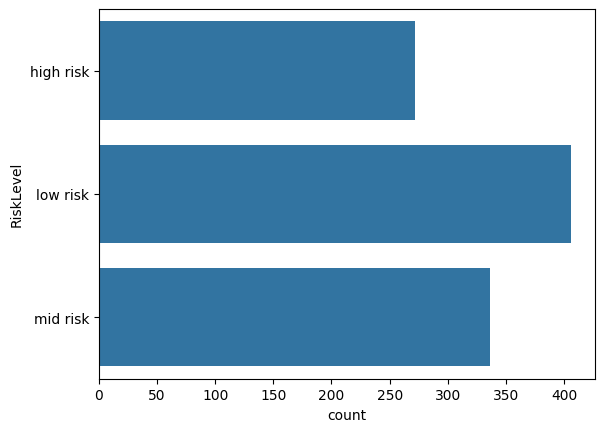

In [ ]:
sns.countplot(original_data['RiskLevel'])

#**1.2 Data Preprocessing**

#**1.2.1 Handling Missing Value**

In [ ]:
original_data = original_data.fillna('none')

In [ ]:
original_data.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [ ]:
# Create an instance of LabelEncoder
encode = LabelEncoder()
original_data["RiskLevel"]=encode.fit_transform(original_data["RiskLevel"])

In [ ]:
print('RiskLevel values are: ', original_data['RiskLevel'].unique())

RiskLevel values are:  [0 1 2]


In [ ]:
# Use inverse_transform to get original values corresponding to the encoded values
original_values = encode.inverse_transform([0, 1, 2])

# Print the mapping of encoded values to original values
for encoded_value, original_value in enumerate(original_values):
    print(f"{encoded_value} --> {original_value}")

0 --> high risk
1 --> low risk
2 --> mid risk


In [ ]:
# Calculate the correlation between the target column 'Maternal_Risk' and all other numeric features
original_data.corr()['RiskLevel'].sort_values()

BS            -0.479958
DiastolicBP   -0.284633
Age           -0.211851
SystolicBP    -0.208797
HeartRate     -0.111637
BodyTemp      -0.006680
RiskLevel      1.000000
Name: RiskLevel, dtype: float64

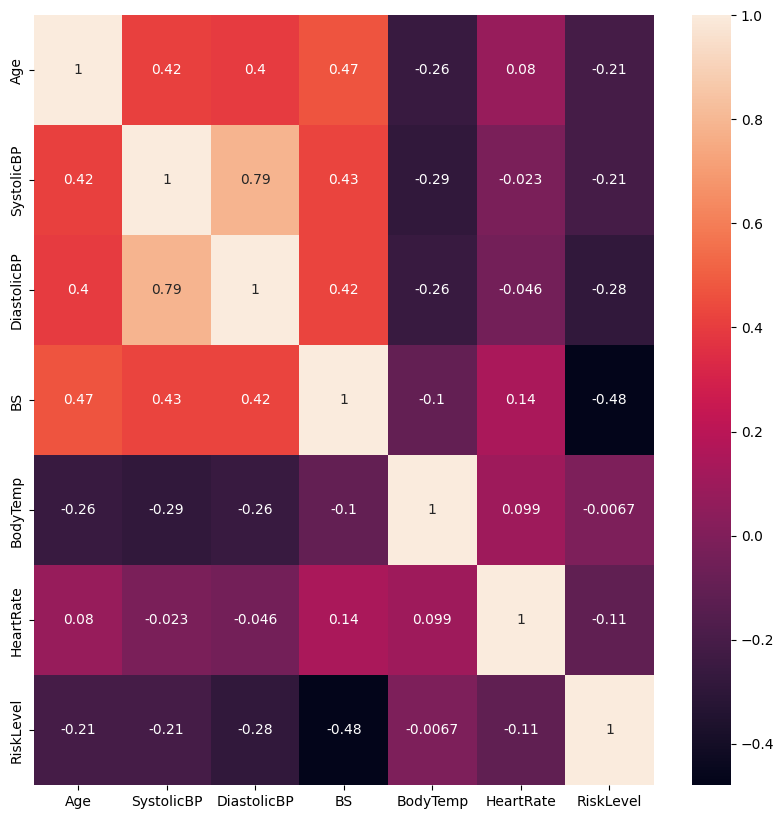

In [ ]:
plt.subplots(figsize=(10,10))
sns.heatmap(original_data.corr(),annot=True)
plt.show()

#**1.2.2 Handling Duplicates**

In [ ]:
print(original_data.duplicated().sum())

562


In [ ]:
# Assuming we have a DataFrame named original_data with a column "RiskLevel"

# Group the DataFrame by "RiskLevel" and count the duplicates in each group
duplicate_counts = original_data[original_data.duplicated()].groupby("RiskLevel").size()

# Print the number of duplicates in each RiskLevel category
print("Duplicate counts in each RiskLevel category:")
print(duplicate_counts)

#low risk     406
#mid risk     336
#high risk    272


Duplicate counts in each RiskLevel category:
RiskLevel
0    160
1    172
2    230
dtype: int64


In [ ]:
# check for data balancy
original_data['RiskLevel'].value_counts()

RiskLevel
1    406
2    336
0    272
Name: count, dtype: int64

In [ ]:
# Assuming you have a DataFrame named original_data with a column "RiskLevel"

# Group the DataFrame by "RiskLevel" and count the duplicates in each group
duplicate_counts = original_data[original_data.duplicated()].groupby("RiskLevel").size()

# Print the number of duplicates in each RiskLevel category
print("Duplicate counts in each RiskLevel category:")
print(duplicate_counts)

Duplicate counts in each RiskLevel category:
RiskLevel
0    160
1    172
2    230
dtype: int64


In [ ]:
#original_data.drop_duplicates(inplace=True)
print(original_data.shape)

(1014, 7)


#**1.2.3 Balancing Dataset**

In [ ]:
# TBD

#***2- Candidate Models Implementation***

## Data Splitting
This cell splits the dataset into training and testing sets to evaluate the model's performance.


*   Training_valdiation set 70% of data.
*   Test set 30% of data.

In [ ]:

X = original_data.drop(columns=['RiskLevel'])
y = original_data['RiskLevel']

# Splitting the dataset into train and test sets with a 70-30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# ***2.1 Modeling Using Random Forest***

In [ ]:
param_grid = {
    'n_estimators': [5 ],  # the number of trees in the forest
    'max_depth': [4],  # the maximum depth of each tree is usually 0 to avoid overfitting
    'max_features': ['sqrt'],  # the number of features to consider at each split
    'min_samples_split': [25],  # the minimum number of samples required to split a node
    'min_samples_leaf': [25],  # the minimum number of samples required to be at a leaf node
    'bootstrap': [True, False],  # whether to use bootstrap samples when building trees
    'criterion': ['gini', 'entropy'],  # the function to measure the quality of a split
}

## Setting Up Grid Search for Decision Tree

Initializes a `DecisionTreeClassifier` and configures `GridSearchCV` with:
- The decision tree classifier (`clf`) as the estimator.
- A parameter grid (`param_grid`) to explore.
- 4-fold cross-validation (`cv=4`).
- f1 score as the scoring metric.
- Try to change the scoring metric.

In [ ]:
# Create an instance of the RandomForestClassifier class
rf = RandomForestClassifier()

# Create an instance of the GridSearchCV class
grid_search_rf = GridSearchCV(estimator= rf ,
                              param_grid= param_grid,
                              cv=4,
                              scoring='f1',
                              n_jobs=-1,
                              verbose=2)

## Executing Grid Search

Runs `grid_search.fit` on the training data (`X_train`, `y_train`) to find the optimal hyperparameter settings based on the defined grid.

In [ ]:
# Fit the grid search object to the data
grid_search_rf.fit(X_train, y_train)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'], 'max_depth': [4],
                         'max_features': ['sqrt'], 'min_samples_leaf': [25],
                         'min_samples_split': [25], 'n_estimators': [5]},
             scoring='f1', verbose=2)

## Retrieving Best Model Parameters from Grid Search

- Extracts `best_params` from `grid_search`, revealing the optimal hyperparameter settings.
- Assigns `best_model` as the best estimator found by grid search.
- Prints `best_params` to display the selected hyperparameters for the best model.

In [ ]:
# Best RF parameters:
best_model_rf = grid_search_rf.best_estimator_

best_params_rf = grid_search_rf.best_params_
print("Best RF parameters:", best_params_rf)

Best RF parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 25, 'min_samples_split': 25, 'n_estimators': 5}


In [ ]:
# Predict on test set
y_pred = grid_search_rf.best_estimator_.predict(X_test)

In [ ]:
# Concatenate X_train and y_train
train_data = pd.concat([X_train, y_train], axis=1)

# Concatenate X_test and y_test
test_data = pd.concat([X_test, y_test], axis=1)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix: \n", cm)

# Generate a classification report
cr = classification_report(y_test, y_pred)
print("\n Classification report: \n", cr)

Accuracy: 0.6950819672131148

Confusion matrix: 
 [[71  6  5]
 [ 5 96 21]
 [15 41 45]]

 Classification report: 
               precision    recall  f1-score   support

           0       0.78      0.87      0.82        82
           1       0.67      0.79      0.72       122
           2       0.63      0.45      0.52       101

    accuracy                           0.70       305
   macro avg       0.70      0.70      0.69       305
weighted avg       0.69      0.70      0.68       305



# ***2.2 Modeling using Naive Bayes Algorithm***

In [ ]:
# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier on the training data
gnb.fit(X_train, y_train)


GaussianNB()

In [ ]:
# Make predictions on the testing data
y_pred = gnb.predict(X_test)

In [ ]:
# Evaluate the classifier's performance
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6065573770491803


In [ ]:
# Define the hyperparameters to tune
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

# Initialize GridSearchCV with the classifier and parameter grid
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best estimator
best_gnb = grid_search.best_estimator_

# Make predictions on the testing data using the best estimator
y_pred = best_gnb.predict(X_test)

# Evaluate the classifier's performance
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix: \n", cm)

# Generate a classification report
cr = classification_report(y_test, y_pred)
print("\n Classification report: \n", cr)


Best Parameters: {'var_smoothing': 1e-05}
Accuracy: 0.6098360655737705

Confusion matrix: 
 [[ 57   8  17]
 [  0 114   8]
 [  6  80  15]]

 Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.70      0.79        82
           1       0.56      0.93      0.70       122
           2       0.38      0.15      0.21       101

    accuracy                           0.61       305
   macro avg       0.61      0.59      0.57       305
weighted avg       0.59      0.61      0.56       305



# ***2.3 K-nearest Neighbors***


In [ ]:

def euclidean_distance(x, y):
    # Convert x and y to numerical arrays
    x = np.array(x, dtype=float)
    y = np.array(y, dtype=float)

    # Compute Euclidean distance element-wise
    distance = np.sqrt(np.sum((x - y) ** 2))

    return distance


In [ ]:

class KNNClassifier:

    def __init__(self, k):
        # Initialize the number of neighbors
        self.k = k

    def fit(self, X, y):
        # Store the training data and labels
        self.X = X
        self.y = y

    def predict(self, X, return_neighbors=False):

        # Predict the labels and Neighbors for new data
        y_pred = []
        Neighbors = []

        for x in X:

            # Compute the distances to all training points using the euclidean_distance function
            distances = [euclidean_distance(x, x_train) for x_train in self.X]

            # Find the k nearest neighbors and their labels
            k_nearest_indices = np.argsort(distances)[:self.k]
            neighbors = [self.X[i] for i in k_nearest_indices]
            labels = [self.y[i] for i in k_nearest_indices]

            # Find the most common label among the neighbors
            mode = Counter(labels).most_common(1)[0][0]

            # Append the prediction and the neighbors to the lists
            y_pred.append(mode)
            Neighbors.append(neighbors)

        # Return the predictions and the neighbors
        if return_neighbors:
            return np.array(y_pred), np.array(Neighbors)
        else:
            return np.array(y_pred)


In [ ]:
def normalize(X, low=0, high=1):

    X_min = np.min(X, axis=0)#axix 0 means array 1 dimension
    X_max = np.max(X, axis=0)
    X_norm = low + (X - X_min) * (high - low) / (X_max - X_min)
    return X_norm


In [ ]:
# Normalize the features
X_data = original_data.drop(columns=['RiskLevel'])
y=original_data['RiskLevel'].values
X_norm=normalize(X_data,1,0)
X_norm=X_norm.values
print (X_norm[:5])
print(y[:5])



[[0.75       0.33333333 0.39215686 0.30769231 1.         0.04819277]
 [0.58333333 0.22222222 0.19607843 0.46153846 1.         0.24096386]
 [0.68333333 0.77777778 0.58823529 0.84615385 0.6        0.12048193]
 [0.66666667 0.22222222 0.29411765 0.92307692 1.         0.24096386]
 [0.58333333 0.44444444 0.78431373 0.99230769 1.         0.1686747 ]]
[0 0 0 0 1]


In [ ]:

# Applying random seed for reproducibility
np.random.seed(42)

# Shuffling indices
indices = np.random.permutation(len(X_norm))

# Splitting data into train and test sets
split = int(len(X_norm) * 0.8)  # 80% train, 20% test

# Selecting training data
X_train = X_norm[indices[:split]]

y_train = y[indices[:split]]

# Selecting testing data
X_test = X_norm[indices[split:]]
y_test = y[indices[split:]]


In [ ]:
# Create and fit the KNN classifiers for different values of K
store_k=[]
for K in [1, 3, 5, 10]:
    knn = KNNClassifier(k=K)  # Create the KNN classifier with the current value of K
    knn.fit(X_train, y_train)  # Fit the classifier on the training data
    # Optionally, you can print some information about the model
    print(f"KNN Classifier (K={K}) trained and fitted successfully.")
    store_k.append(knn)

KNN Classifier (K=1) trained and fitted successfully.
KNN Classifier (K=3) trained and fitted successfully.
KNN Classifier (K=5) trained and fitted successfully.
KNN Classifier (K=10) trained and fitted successfully.


In [ ]:
# Predict on the training set

for knn in store_k:
 y_pred_train, train_neighbors = knn.predict(X_train, return_neighbors=True)

# Compute accuracy
 accuracy_train = np.mean(y_pred_train == y_train)


 print(f'Accuracy: {accuracy_train}')


Accuracy: 0.9099876695437731
Accuracy: 0.8791615289765722
Accuracy: 0.8175092478421702
Accuracy: 0.781750924784217


In [ ]:
# Predict on the testing set
for knn in store_k:
 test, train_neighbors = knn.predict(X_test, return_neighbors=True)

# Compute accuracy
 accuracy_test = np.mean(test== y_test)

 print(f'Accuracy: {accuracy_train}')

Accuracy: 0.781750924784217
Accuracy: 0.781750924784217
Accuracy: 0.781750924784217
Accuracy: 0.781750924784217


#***2.5   Artificial Neural Networks***

***Extracting features and target variable***

In [ ]:
X = original_data.iloc[:, 0:-1].values
X

array([[ 25., 130.,  80.,  15.,  98.,  86.],
       [ 35., 140.,  90.,  13.,  98.,  70.],
       [ 29.,  90.,  70.,   8., 100.,  80.],
       ...,
       [ 35.,  85.,  60.,  19.,  98.,  86.],
       [ 43., 120.,  90.,  18.,  98.,  70.],
       [ 32., 120.,  65.,   6., 101.,  76.]])

In [ ]:
y = to_categorical(original_data['RiskLevel'], num_classes=3)
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print ("X_train =",X_train.shape, " --- y_train = ", y_train.shape )
print ("X_val =",X_val.shape, " --- y_val = ", y_val.shape )
print ("X_test =",X_test.shape, " --- y_test = ", y_test.shape )

X_train = (709, 6)  --- y_train =  (709, 3)
X_val = (152, 6)  --- y_val =  (152, 3)
X_test = (153, 6)  --- y_test =  (153, 3)


***Scaling the features***

In [ ]:
scaler = StandardScaler()

In [ ]:

# Performing Feature Scaling using StandardScalar class from the sklearn library
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ensure the data type is float64 after scaling (if not done automatically)
X_train = np.array(X_train, dtype=np.float64)
X_test = np.array(X_test, dtype=np.float64)


In [ ]:
n_cols = X_train.shape[1]

***Building the Model***

In [ ]:
model = Sequential()

In [ ]:
# adding layers
# standard layer type is called Dense Layer
# all nodes of previous layer connect to the current layer
from tensorflow.keras.layers import Dense, Dropout

# First Hidden Layer
model.add(Dense(100, activation='relu', input_shape=(n_cols,)))

Dropout(0.2)

# Second Hidden Layer
model.add(Dense(100, activation='relu'))

# Second Hidden Layer
model.add(Dense(100, activation='relu'))


# Output Layer
model.add(Dense(3, activation='softmax'))

***Three Layers Network***

#2. Compiling the Model

In [ ]:

model.compile(
    optimizer = 'adam', # the optimizer controls the learning rate or use sgd
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
# Define early_stopping_monitor
early_stopping_monitor = early_stopping_monitor = EarlyStopping(patience = 2)

In [ ]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 20, callbacks = [early_stopping_monitor] )

Epoch 1/20
23/23 [==============================] - 1s 13ms/step - loss: 0.9765 - accuracy: 0.5684 - val_loss: 42.0897 - val_accuracy: 0.2171
Epoch 2/20
23/23 [==============================] - 0s 3ms/step - loss: 0.7834 - accuracy: 0.6615 - val_loss: 102.4592 - val_accuracy: 0.2171
Epoch 3/20
23/23 [==============================] - 0s 4ms/step - loss: 0.7192 - accuracy: 0.6700 - val_loss: 132.5225 - val_accuracy: 0.2171


In [ ]:
# Plotting the loss function
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Function During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


NameError: name 'history' is not defined

In [ ]:
# Classification report for test set
print("Classification Report - Test Set:")
print (classification_report(y_test, Y_pred))

# Classification report for training set
print("Classification Report - Training Set:")
#print(classification_report(Y_train, Y_pred_train))

Classification Report - Test Set:


NameError: name 'Y_pred' is not defined

In [ ]:
# Verify that model contains information from compiling
print("Loss function: " + model.loss)

Loss function: categorical_crossentropy


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               700       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 3)                 303       
                                                                 
Total params: 21203 (82.82 KB)
Trainable params: 21203 (82.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Plotting loss and accuracy during training
plt.figure(figsize=(10, 6))

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss', color='blue', linestyle='-')

# Plot validation loss
plt.plot(history.history['val_loss'], label='Validation Loss', color='red', linestyle='--')

# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', color='green', linestyle='-.')

# Plot validation accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', linestyle='--')

plt.title('Loss and Accuracy During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'history' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Convert data to predict to numpy array
# Convert X_train from DataFrame to numpy array
pred_data = np.array(X_train)




In [ ]:
# Calculate predictions: predictions
predictions = model.predict(pred_data)

# Calculate predicted probability of survival: predicted_prob_true
predicted_prob_true = predictions[:, 1]

# Print predicted_prob_true
print(predicted_prob_true)

In [ ]:
# Create list of learning rates: lr_to_test
lr_to_test = [0.000001, 0.01, 1]

In [ ]:
# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )

    # Build new model to test, unaffected by previous models
    model = get_new_model(n_cols)

    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(lr = lr)

    # Compile the model
    model.compile(
        optimizer = my_optimizer,
        loss = 'categorical_crossentropy',
        metrics = ['accuracy']
    )



In [ ]:
# Define early_stopping_monitor
early_stopping_monitor = early_stopping_monitor = EarlyStopping(patience = 2)

In [ ]:
# Fit the model
model.fit(predictors, target, validation_split = 0.3, epochs = 20, callbacks = [early_stopping_monitor] )

In [ ]:
# Fit model_1
model_1_training = model.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

In [ ]:
# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()